# House Price Prediction

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview 

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

Import libraries and read the data

In [3]:
pip install black flake8 mypy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
test.shape

(1459, 80)

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Check for null values

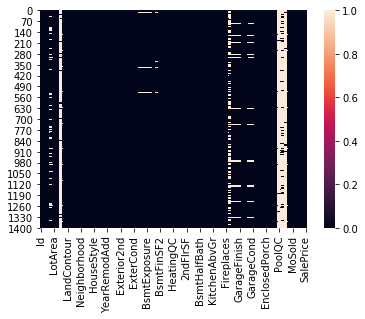

In [5]:
sns.heatmap(df.isnull())

In [6]:
notna = ['Fence', 'PoolQC', 'GarageCond', 'GarageQual', 'GarageFinish', 
         'GarageType', 'FireplaceQu', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure',
        'BsmtCond', 'BsmtQual', 'Alley', 'MiscFeature']   # Some NA values are not NAs but absent feature 
                                                            # in a house e.g. 'No fence, no garage'

In [7]:
df[notna] = df[notna].fillna('abs')     # replace notna values with abs for being absent
df.fillna(df.mean(), inplace = True)        # finn null values with means if integer or flot
df.dropna(axis = 0, inplace = True)         #drop the leftover rows with null values

test[notna] = test[notna].fillna('abs')
test.fillna(test.mean(), inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   object 
 6   Alley          1451 non-null   object 
 7   LotShape       1451 non-null   object 
 8   LandContour    1451 non-null   object 
 9   Utilities      1451 non-null   object 
 10  LotConfig      1451 non-null   object 
 11  LandSlope      1451 non-null   object 
 12  Neighborhood   1451 non-null   object 
 13  Condition1     1451 non-null   object 
 14  Condition2     1451 non-null   object 
 15  BldgType       1451 non-null   object 
 16  HouseStyle     1451 non-null   object 
 17  OverallQual    1451 non-null   int64  
 18  OverallC

In [9]:
df.isnull().sum().sum() # number of null values in train data

0

In [10]:
test.isnull().sum().sum()  #number of null values in test data

28

In [11]:
df.shape

(1451, 81)

In [12]:
test.shape

(1459, 80)

Select categorical and numerical features from the dataframe

In [13]:
categorical = np.array(df.select_dtypes(include = 'object').columns)

numerical = np.array(df.select_dtypes(include = ['float64', 'int64']).columns)

In [14]:
categorical

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

In [15]:
numerical

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

In [16]:
num = 0
for category in categorical:
    print(category, ': ', df[category].unique(), ': ', df[category].nunique())
    num = num + df[category].nunique()
print(num)

MSZoning :  ['RL' 'RM' 'C (all)' 'FV' 'RH'] :  5
Street :  ['Pave' 'Grvl'] :  2
Alley :  ['abs' 'Grvl' 'Pave'] :  3
LotShape :  ['Reg' 'IR1' 'IR2' 'IR3'] :  4
LandContour :  ['Lvl' 'Bnk' 'Low' 'HLS'] :  4
Utilities :  ['AllPub' 'NoSeWa'] :  2
LotConfig :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] :  5
LandSlope :  ['Gtl' 'Mod' 'Sev'] :  3
Neighborhood :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] :  25
Condition1 :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] :  9
Condition2 :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] :  8
BldgType :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] :  5
HouseStyle :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] :  8
RoofStyle :  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] :  6
Roof

In [17]:
num = 0
for category in categorical:
    print(category, ': ', test[category].unique(), ': ', test[category].nunique())
    num = num + test[category].nunique()
print(num)

MSZoning :  ['RH' 'RL' 'RM' 'FV' 'C (all)' nan] :  5
Street :  ['Pave' 'Grvl'] :  2
Alley :  ['abs' 'Pave' 'Grvl'] :  3
LotShape :  ['Reg' 'IR1' 'IR2' 'IR3'] :  4
LandContour :  ['Lvl' 'HLS' 'Bnk' 'Low'] :  4
Utilities :  ['AllPub' nan] :  1
LotConfig :  ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3'] :  5
LandSlope :  ['Gtl' 'Mod' 'Sev'] :  3
Neighborhood :  ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker'] :  25
Condition1 :  ['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery' 'RRNn' 'PosA' 'RRAn' 'RRAe'] :  9
Condition2 :  ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery'] :  5
BldgType :  ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon'] :  5
HouseStyle :  ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf'] :  7
RoofStyle :  ['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed'] :  6
RoofMatl :  ['CompShg' 'Tar&Grv' 'W

After comparing the categories in test and train dataframes, it is clear that the number of categories in each categorical feature is different. This information will help to prevent the model from failing when training on some categorical features and testing with additional new ones.

In [18]:
# len(numerical)

Perform OneHotEncoder on categorical features.

In [43]:
test[categorical].isnull().sum().sum()

28

In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore')  # As discussed above, the handle_unknown is false because the model will see
                                                        #new categories in the test dataset
df2 = encoder.fit_transform(df[categorical]) # fit_transform to train data but only transform to test
test2 = encoder.transform(test[categorical])

df_encoded = pd.DataFrame(df2.toarray())
test_encoded = pd.DataFrame(test2.toarray())
df_encoded.set_index(df.index, inplace = True)
test_encoded.set_index(test.index, inplace = True)

In [20]:
df4 = pd.concat([df[numerical], df_encoded], axis = 1)     # Concatenate numerical features with newly created onehotencoded 
numerical_test = np.array(test.select_dtypes(include = ['float64', 'int64']).columns) # do the same for the test data.
test4 = pd.concat([test[numerical_test], test_encoded], axis = 1)

In [21]:
X = df4.drop(['Id', 'SalePrice'], axis = 1)  # drop the Sale price from the dataframe to keep only features.
y = df4['SalePrice']                  
test4.drop(['Id'], axis = 1, inplace = True) 

In [22]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,256,257,258,259,260,261,262,263,264,265
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [24]:
test4.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,256,257,258,259,260,261,262,263,264,265
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
final = pd.read_csv('sample_submission.csv')
final.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


Choose Ridge hyperparameter via GridSearchCV

In [26]:
n = np.arange(0,10,0.01)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test4)

In [28]:
%%time
from sklearn.linear_model import Ridge
ridge = Ridge()  
from sklearn.model_selection import GridSearchCV
parameters = {
    'alpha' : n
}
GS = GridSearchCV(ridge,param_grid = parameters, cv = 10, n_jobs = -1, scoring='neg_mean_absolute_error')

Wall time: 101 ms


In [29]:
%%time
best = GS.fit(X_scaled, y)
df = pd.DataFrame(best.cv_results_)
df

Wall time: 54.5 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.185200,0.011812,0.002067,0.002052,0.0,{'alpha': 0.0},-3.270461e+16,-8.896318e+16,-2.365703e+17,-19385.427586,-4.109152e+16,-6.709289e+16,-1.460588e+17,-1.119637e+17,-1.967402e+17,-2.567762e+17,-1.177961e+17,8.419619e+16,1000
1,0.037343,0.004249,0.001196,0.000400,0.01,{'alpha': 0.01},-1.655969e+04,-1.992025e+04,-1.704854e+04,-18644.765930,-1.994636e+04,-1.976221e+04,-1.615961e+04,-1.483575e+04,-2.446369e+04,-1.434040e+04,-1.816813e+04,2.868193e+03,892
2,0.038849,0.005281,0.001201,0.000405,0.02,{'alpha': 0.02},-1.649547e+04,-1.983146e+04,-1.707876e+04,-18642.033110,-1.994815e+04,-1.945686e+04,-1.612750e+04,-1.487127e+04,-2.441128e+04,-1.412063e+04,-1.809834e+04,2.866164e+03,422
3,0.038206,0.007650,0.001279,0.000400,0.03,{'alpha': 0.03},-1.644223e+04,-1.974618e+04,-1.709853e+04,-18641.086269,-1.995137e+04,-1.924086e+04,-1.611385e+04,-1.489920e+04,-2.436599e+04,-1.430039e+04,-1.807997e+04,2.817242e+03,236
4,0.039686,0.006880,0.001685,0.000714,0.04,{'alpha': 0.04},-1.639415e+04,-1.967216e+04,-1.712278e+04,-18648.895845,-1.995497e+04,-1.906529e+04,-1.610861e+04,-1.492278e+04,-2.432488e+04,-1.440231e+04,-1.806168e+04,2.783492e+03,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.037713,0.004660,0.001363,0.000465,9.95,{'alpha': 9.950000000000001},-1.627028e+04,-1.727135e+04,-1.821122e+04,-20013.214476,-2.086757e+04,-1.662273e+04,-1.757718e+04,-1.633898e+04,-2.261305e+04,-1.621345e+04,-1.819990e+04,2.115431e+03,995
996,0.036873,0.003046,0.001523,0.000654,9.96,{'alpha': 9.96},-1.627021e+04,-1.727156e+04,-1.821143e+04,-20014.229773,-2.086869e+04,-1.662281e+04,-1.757790e+04,-1.633923e+04,-2.261274e+04,-1.621376e+04,-1.820026e+04,2.115515e+03,996
997,0.036474,0.004047,0.001396,0.000489,9.97,{'alpha': 9.97},-1.627013e+04,-1.727176e+04,-1.821165e+04,-20015.271649,-2.086981e+04,-1.662288e+04,-1.757862e+04,-1.633947e+04,-2.261242e+04,-1.621407e+04,-1.820061e+04,2.115600e+03,997
998,0.034927,0.004368,0.001297,0.000639,9.98,{'alpha': 9.98},-1.627006e+04,-1.727197e+04,-1.821187e+04,-20016.315521,-2.087094e+04,-1.662296e+04,-1.757934e+04,-1.633971e+04,-2.261211e+04,-1.621438e+04,-1.820096e+04,2.115686e+03,998


In [30]:
best.best_params_

{'alpha': 0.18}

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.18)    
ridge.fit(X_scaled, y)
ridge_pred = ridge.predict(test_scaled)

final['SalePrice'] = ridge_pred
final.to_csv('F_ridge_MinMax.csv', index = False)

## Attepmts and tries

In [32]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X,y)
pred = linreg.predict(test4)
final['SalePrice'] = pred
final.to_csv('F_linreg.csv', index = False)

In [33]:
from sklearn.linear_model import Ridge, Lasso
from numpy import linalg as LA
ridge = Ridge(alpha = 0.01, fit_intercept = False).fit(X, y)
ridge_pred = ridge.predict(test4)
final['SalePrice'] = ridge_pred
final.to_csv('F_ridge.csv', index = False)

In [34]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = df4[numerical].columns
vif_data["VIF"] = [variance_inflation_factor(df4[numerical].values, i) for i in range(len(df4[numerical].columns))]
vif_data

,feature,VIF
0,Id,4.100740e+00
1,MSSubClass,4.807575e+00
2,LotFrontage,1.748004e+01
3,LotArea,2.675928e+00
4,OverallQual,7.645093e+01
5,OverallCond,4.220699e+01
6,YearBuilt,2.154361e+04
7,YearRemodAdd,2.237753e+04
8,MasVnrArea,1.899057e+00
9,BsmtFinSF1,inf


In [35]:
finite = vif_data[vif_data['VIF'] < 100]
vif_columns = finite['feature']
vif_columns.to_csv('vifcolumns.csv')

In [36]:
X_vif = X.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF','2ndFlrSF', 'YrSold'], axis =1)
X_vif

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,LowQualFinSF,...,256,257,258,259,260,261,262,263,264,265
0,60,65.0,8450,7,5,2003,2003,196.0,856,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,1262,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,920,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,756,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,1145,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,953,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,20,85.0,13175,6,6,1978,1988,119.0,1542,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,70,66.0,9042,7,9,1941,2006,0.0,1152,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,20,68.0,9717,5,6,1950,1996,0.0,1078,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
test4_vif = test4.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF','2ndFlrSF', 'YrSold'], axis =1)
test4_vif

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,LowQualFinSF,...,256,257,258,259,260,261,262,263,264,265
0,20,80.0,11622,5,6,1961,1961,0.0,882.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,81.0,14267,6,6,1958,1958,108.0,1329.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,74.0,13830,5,5,1997,1998,0.0,928.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60,78.0,9978,6,6,1998,1998,20.0,926.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,120,43.0,5005,8,5,1992,1992,0.0,1280.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,546.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,160,21.0,1894,4,5,1970,1970,0.0,546.0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,85,62.0,10441,5,5,1992,1992,0.0,912.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_vif)

ridge = Ridge(alpha = 0.01)
ridge.fit(X_scaled, y)

test_scaled = scaler.transform(test4_vif)
ridge_pred = ridge.predict(test_scaled)

final['SalePrice'] = ridge_pred
final.to_csv('VIF2.csv', index = False)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(X)
pca_data = pca.transform(X)
pca_data = pd.DataFrame(pca_data)
pca_data.head()

,0,1,2,3,4,5
0,-2056.360826,23.650250,-281.065673,736.439504,-172.801568,-188.397886
1,-903.037663,-17.090842,745.147249,222.518516,-47.370314,-78.114045
2,743.326056,94.764495,-468.407905,413.792369,-130.444893,-176.426959
3,-961.669647,-45.920562,-580.760603,182.754084,-98.952262,8.515987
4,3767.044625,648.020409,-526.561136,540.745045,-141.403367,-185.040359


In [40]:
pca_test = pca.transform(test4)
pca_test = pd.DataFrame(pca_test)
pca_test.head()

,0,1,2,3,4,5
0,1100.828901,-708.781056,388.716814,11.872016,-61.943422,-45.670812
1,3788.173079,-480.585240,159.363830,2104.556856,12278.172668,-47.145604
2,3322.892859,-123.351826,-101.073428,657.592294,-166.443629,-157.557627
3,-529.985215,-48.073056,-195.176490,445.967610,-126.085675,-142.378430
4,-5503.607947,132.216114,238.647960,-621.713687,84.792750,-49.872326


In [41]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
per_var

array([98.5,  0.5,  0.3,  0.3,  0.2,  0.1])

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pca_data_scaled = scaler.fit_transform(pca_data)
pca_test_scaled = scaler.transform(pca_test)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(pca_data,y)
pred = linreg.predict(pca_test)
final['SalePrice'] = pred
final.to_csv('F_linreg_PCA_scaled.csv', index = False)